In [194]:
# bring in lots of stuff

# dataset creator
import sklearn.datasets as data

# plotting stuff
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D # 3D plotting. Cool!!

# modeling stuff
from sklearn import linear_model
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# keep plots in the notebook
%matplotlib inline

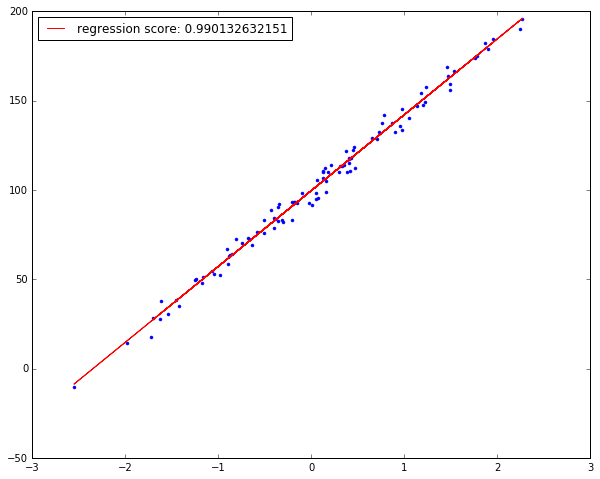

In [226]:
# create single feature regression data
X,y,coef = data.make_regression(n_samples=100, n_features=1, random_state=0, noise=4.0, bias=100.0, coef=True)

# solve the model
model = linear_model.LinearRegression(fit_intercept=True,normalize=True)
model.fit(X,y)
result = model.predict(X)

# draw a pretty picture
plt.figure(figsize=(10,8))
plt.plot(X, y, 'b.')
plt.plot(X,result,'r', label="regression score: "+ str(model.score(X,y)))
plt.legend(loc="best")

plt.show()

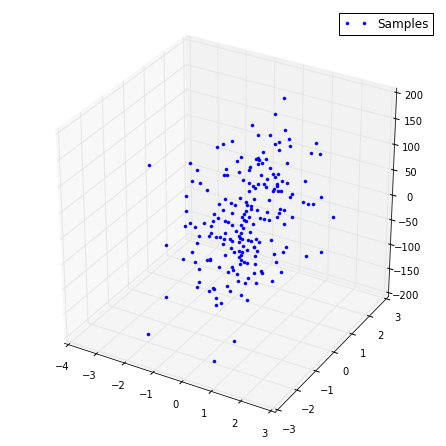

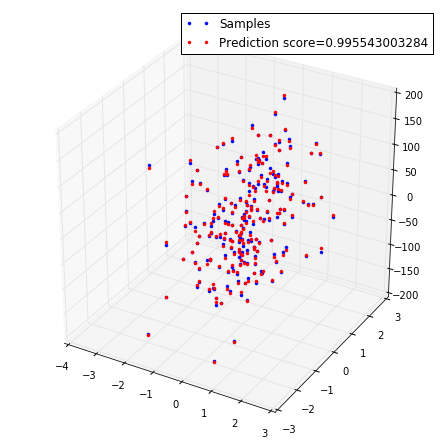

In [223]:
# Multi feature regression

# Create 2 feature regression data
X_multi,y_multi,coef = data.make_regression(n_samples=200, n_features=2, random_state=6, noise=4.0,coef=True)

# solve the regression model
model = linear_model.LinearRegression(fit_intercept=True,normalize=True)
model.fit(X_multi,y_multi)
result = model.predict(X_multi)

# make some pretty pictures
# plot base samples
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
ax.plot(X_multi[:,0], X_multi[:,1],y_multi, 'b.', label="Samples")
plt.legend(loc="best")

# plot base samples and the prediction
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
ax.plot(X_multi[:,0], X_multi[:,1],y_multi, 'b.', label="Samples")
ax.plot(X_multi[:,0], X_multi[:,1],result, 'r.', label="Prediction score=" + str(model.score(X_multi,y_multi)))
plt.legend(loc="best")
plt.show()

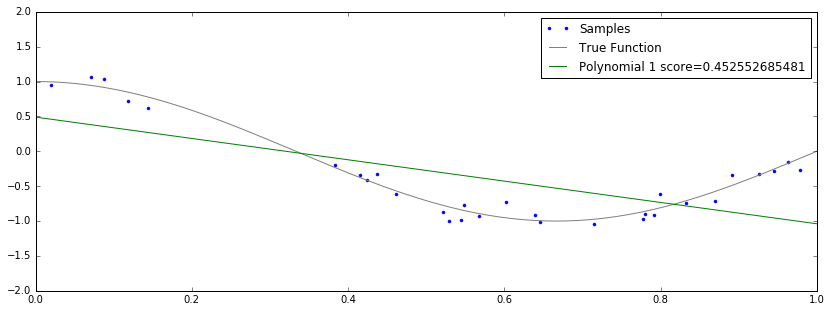

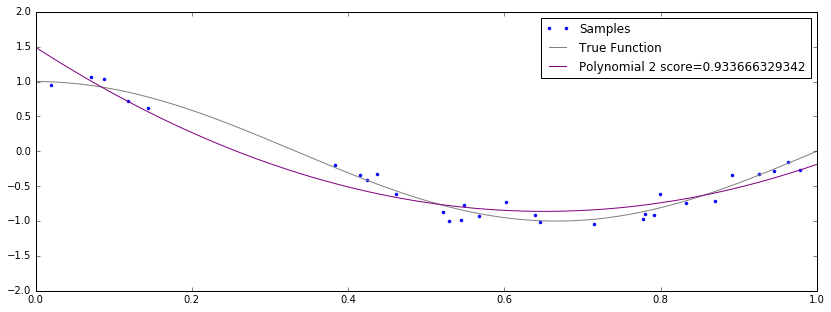

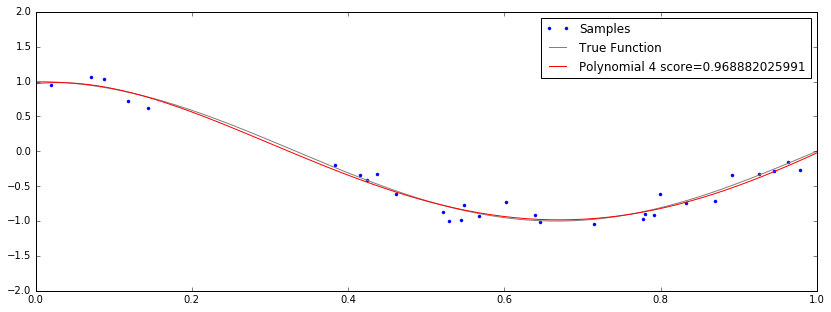

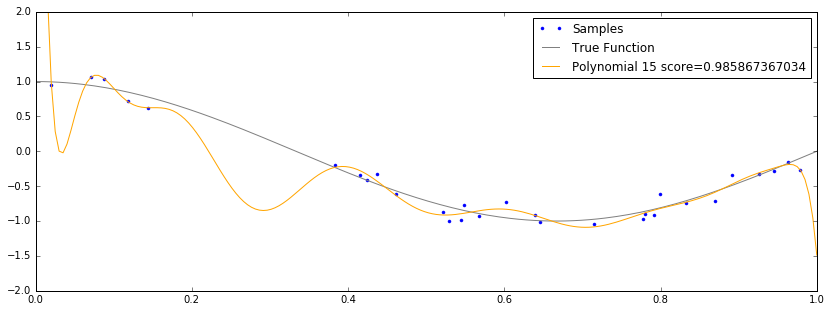

In [231]:
# show polynomial overfitting

# lock RNG for reproducibility
np.random.seed(0)

# small number of samples to encourage overfitting
n_samples = 30

# create the test data
true_fun = lambda X: np.cos(1.5 * np.pi * X)
X = np.random.rand(n_samples)
y = true_fun(X) + np.random.randn(n_samples) * 0.1
# have to add a column for the intercept by including np.newaxis
X = X[:,np.newaxis]

# get lots of point so we can plot a curve of the prediction model
X_test = np.linspace(0, 1, 200)
X_test = X_test[:,np.newaxis]

# plotting colors
colors = ['g','purple','r','orange']

degrees = [1, 2, 4, 15]

# chart stuff
def plot_helper(i, result, score):
    plt.figure(i, figsize=(14,5))
    # bound axis for prettyness
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    
    # plot samples, the true function, and prediction all together
    plt.plot(X,y,'b.', label="Samples")
    plt.plot(X_test, true_fun(X_test), 'gray', label="True Function")
    plt.plot(X_test,result,colors[i], label="Polynomial " + str(degrees[i]) + " score=" + str(score))
    plt.legend(loc="best")

for i in range(len(degrees)):
    # PolynomialFeatures adds polynomial features to X
    # Use the standard linear regression feature
    model = make_pipeline(PolynomialFeatures(degrees[i], include_bias=False), linear_model.LinearRegression())
    model.fit(X, y)
    result = model.predict(X_test)
    score = model.score(X,y)
    plot_helper(i, result, score)
    


In [162]:
# Linear data with 4 of 20 features having high correlation
X,y,coef = data.make_regression(n_samples=1000, n_features=20, n_informative=4, noise=4, coef=True)

In [233]:
X_test

array([[ 0.        ],
       [ 0.00502513],
       [ 0.01005025],
       [ 0.01507538],
       [ 0.0201005 ],
       [ 0.02512563],
       [ 0.03015075],
       [ 0.03517588],
       [ 0.04020101],
       [ 0.04522613],
       [ 0.05025126],
       [ 0.05527638],
       [ 0.06030151],
       [ 0.06532663],
       [ 0.07035176],
       [ 0.07537688],
       [ 0.08040201],
       [ 0.08542714],
       [ 0.09045226],
       [ 0.09547739],
       [ 0.10050251],
       [ 0.10552764],
       [ 0.11055276],
       [ 0.11557789],
       [ 0.12060302],
       [ 0.12562814],
       [ 0.13065327],
       [ 0.13567839],
       [ 0.14070352],
       [ 0.14572864],
       [ 0.15075377],
       [ 0.15577889],
       [ 0.16080402],
       [ 0.16582915],
       [ 0.17085427],
       [ 0.1758794 ],
       [ 0.18090452],
       [ 0.18592965],
       [ 0.19095477],
       [ 0.1959799 ],
       [ 0.20100503],
       [ 0.20603015],
       [ 0.21105528],
       [ 0.2160804 ],
       [ 0.22110553],
       [ 0

In [163]:
model = linear_model.LinearRegression(fit_intercept=True,normalize=True)
model.fit(X,y)
model.score(X,y)

0.99873989019206799

In [171]:
# which features are the right ones? Because we made the data we can cheat and call model.coef_ to see
print(coef)

[  0.           4.9859956    0.           0.           0.           0.           0.
   0.           0.          94.70754004   0.           0.           0.           0.
   0.          44.5541148    0.           0.           0.          16.76449062]
